In [28]:
install.packages('moments')
library(moments)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



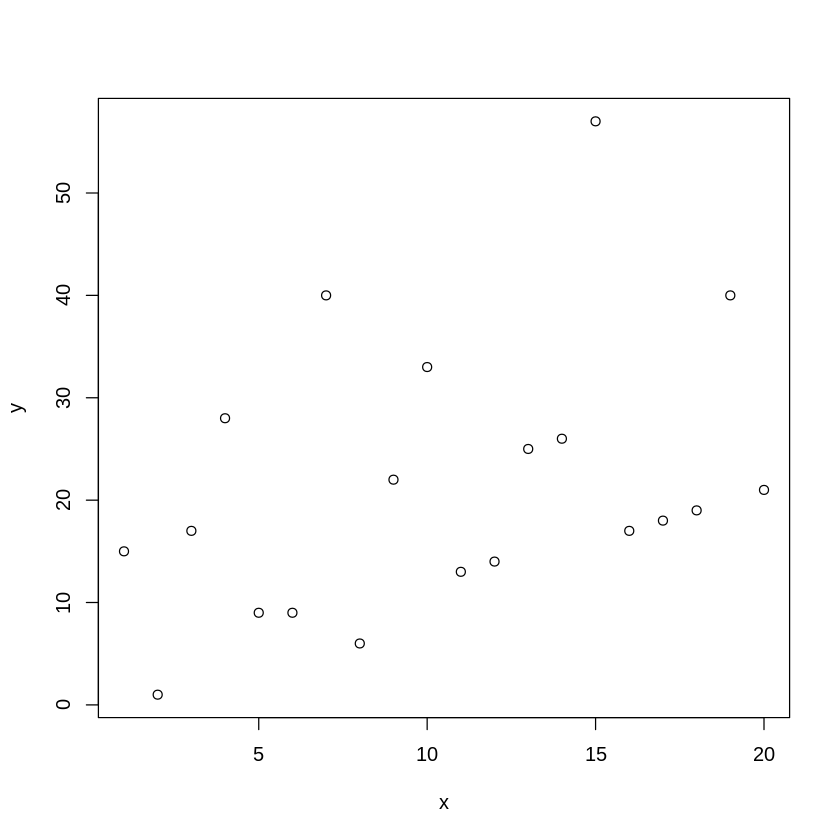

In [29]:
x = c(1:20)
y = c(15,1,17,28,9,9,40,6,22,33,13,14,25,26,57,17,18,19,40,21)
plot(x, y)

# A

In [30]:
df = data.frame(x, y)
df

x,y
<int>,<dbl>
1,15
2,1
3,17
4,28
5,9
6,9
7,40
8,6
9,22


In [36]:
attach(df)

The following objects are masked _by_ .GlobalEnv:

    x, y





Skewness of Y:  0.9558515 
Kurtosis of Y:  3.796495 


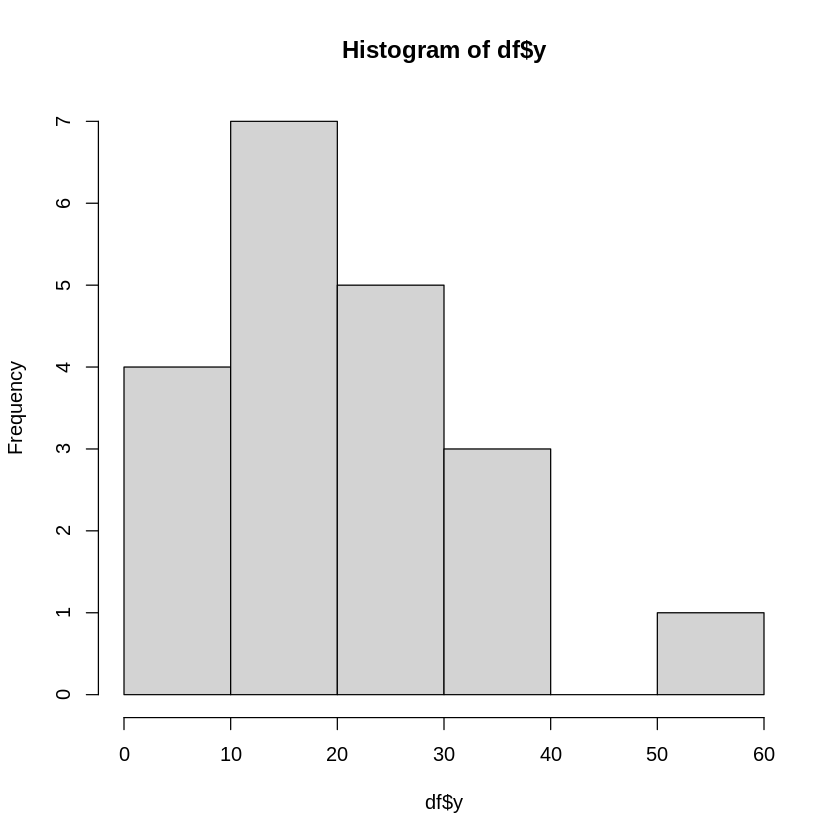

In [32]:
cat('\nSkewness of Y: ', skewness(df$y), '\n')
cat('Kurtosis of Y: ', kurtosis(df$y), '\n')
hist(df$y)

In [33]:
g = pgamma(1:10,shape=2,1)
g

[1] 0.2642411 0.5939942 0.8008517 0.9084218 0.9595723 0.9826487 0.9927049
 [8] 0.9969808 0.9987659 0.9995006

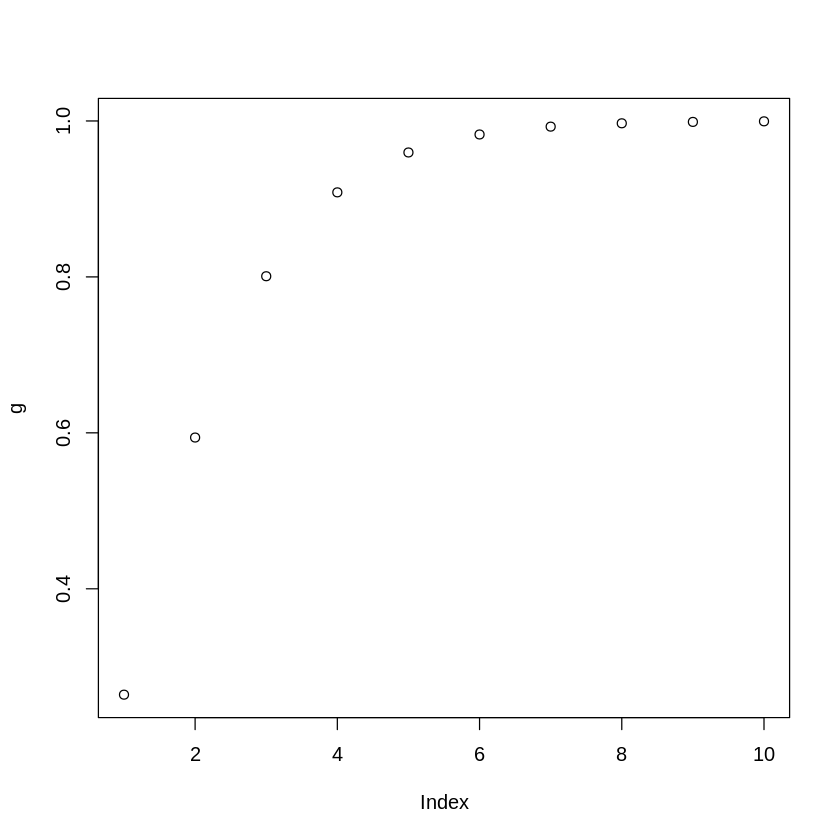

In [34]:
plot(g)

In [38]:
glm(y~x)


Call:  glm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    12.4211       0.8647  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    3355 
Residual Deviance: 2858 	AIC: 162

In [39]:
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.338  -8.945  -3.203   4.276  31.609 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  12.4211     5.8532   2.122   0.0480 *
x             0.8647     0.4886   1.770   0.0937 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.6 on 18 degrees of freedom
Multiple R-squared:  0.1482,	Adjusted R-squared:  0.1009 
F-statistic: 3.131 on 1 and 18 DF,  p-value: 0.09373


In [43]:
loglink <- glm(y ~ x, family = Gamma(link = "log"))
summary(loglink)


Call:
glm(formula = y ~ x, family = Gamma(link = "log"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8600  -0.4386  -0.1623   0.1701   0.9312  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.57079    0.28471   9.030 4.19e-08 ***
x            0.04451    0.02377   1.873   0.0774 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.3756381)

    Null deviance: 9.7990  on 19  degrees of freedom
Residual deviance: 8.6019  on 18  degrees of freedom
AIC: 160.23

Number of Fisher Scoring iterations: 6


In [45]:
idenlink <- glm(y ~ x, family = Gamma(link = "identity"), start=c(0.5,8))
summary(idenlink)


Call:
glm(formula = y ~ x, family = Gamma(link = "identity"), start = c(0.5, 
    8))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8214  -0.4675  -0.1628   0.2329   0.9094  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  11.2731     4.4122   2.555   0.0199 *
x             0.9828     0.4840   2.031   0.0573 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.3702852)

    Null deviance: 9.7990  on 19  degrees of freedom
Residual deviance: 8.4976  on 18  degrees of freedom
AIC: 159.97

Number of Fisher Scoring iterations: 5


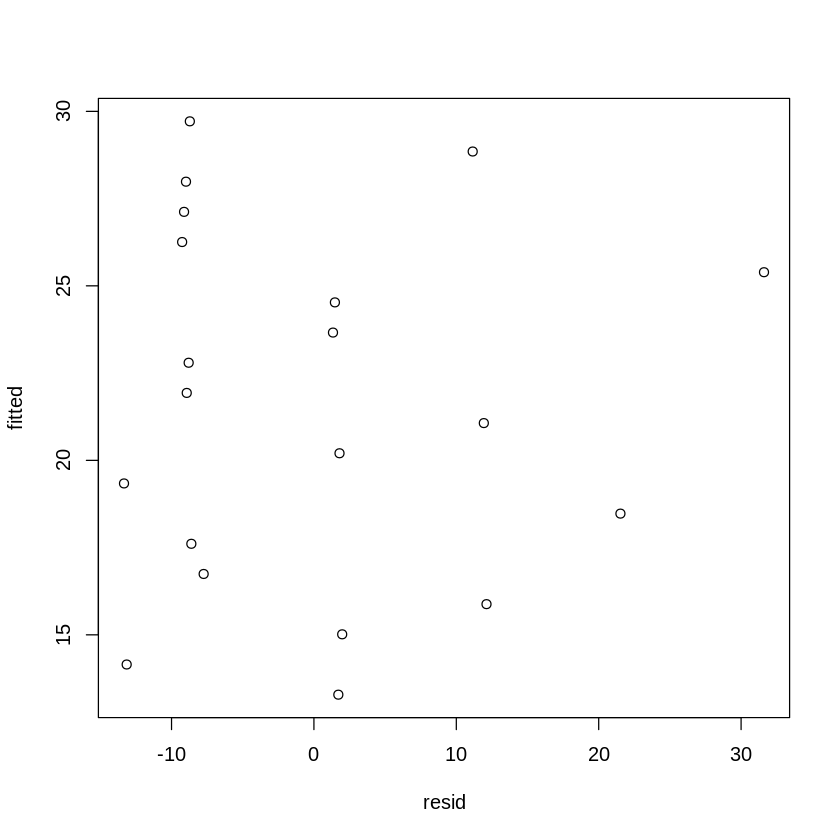

In [46]:
model <- lm(y~x)
resid<-model$residuals
fitted<-model$fitted.values
plot(fitted~resid)

Looks like we have positive skewness in residuals

In [48]:
cat('\nSkewness of Residuals: ', skewness(resid), '\n')
cat('\nSkewness of Fitted: ', skewness(fitted), '\n')


Skewness of Residuals:  1.064492 

Skewness of Fitted:  -5.47479e-16 



Skewness of Residuals:  0.7543656 

Skewness of Fitted:  0.3039432 


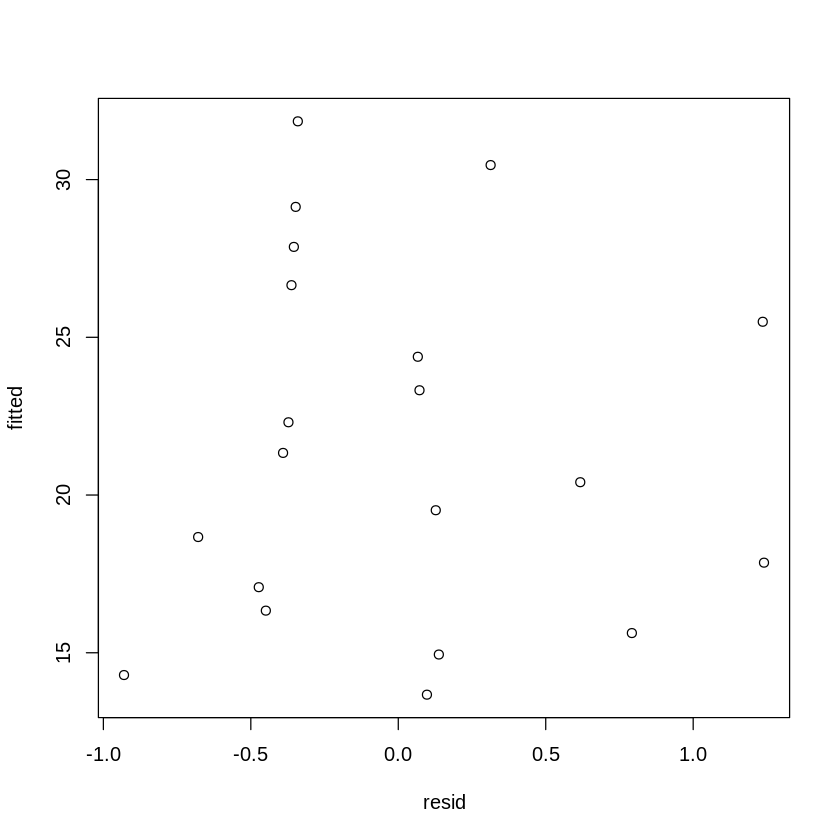

In [49]:
resid<-loglink$residuals
fitted<-loglink$fitted.values
plot(fitted~resid)
cat('\nSkewness of Residuals: ', skewness(resid), '\n')
cat('\nSkewness of Fitted: ', skewness(fitted), '\n')